<a href="https://colab.research.google.com/github/Victor-T2001/Term-Project-2021/blob/main/TP21%203.2%20KOSPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model
import random, numpy
from numpy.random import seed

SEED = 12345

In [4]:
df = pd.read_excel('Data for NN KOSPI.xlsx')
df.index = pd.to_datetime(df.Date)
df.drop(['Date'], axis='columns', inplace=True)
df.head()

,Percent change 1,Percent change 5,Percent change 30,Percent change Open,Percent change High,Percent change Low,Percent change Volume,DI,ERI,SMA 1,EMA 1,LWMA 1,MAE 1,MAE 2,MAE 3,MAE 4,CCI 1,SO 1,CMO 1,Y
Date,,,,,,,,,,,,,,,,,,,,
2000-03-16,0.004406,-0.049028,-0.094245,0.012599,0.022181,0.014470,-0.044743,-1,-1,0,-1,-1,1,-1,-1,1,1,-1,-1,1
2000-03-17,0.017059,-0.040152,-0.093282,0.019413,0.010948,0.021474,0.006357,-1,-1,0,1,1,1,1,1,1,1,-1,1,0
2000-03-20,-0.005914,-0.004856,-0.104934,-0.001944,-0.002621,-0.007741,-0.242354,-1,-1,0,-1,1,1,1,1,1,1,-1,1,1
2000-03-21,0.015167,0.019687,-0.112750,-0.013644,-0.004761,-0.005312,0.000000,-1,-1,0,1,1,1,1,1,1,-1,-1,1,1
2000-03-22,0.022029,0.053610,-0.081969,0.022294,0.026778,0.032170,0.298815,1,-1,1,1,1,1,1,1,1,1,-1,1,0


In [5]:
X = df.copy()
Y = X.pop('Y')
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, train_size=0.75, random_state=42, shuffle=False)

In [6]:
X_train.tail()

,Percent change 1,Percent change 5,Percent change 30,Percent change Open,Percent change High,Percent change Low,Percent change Volume,DI,ERI,SMA 1,EMA 1,LWMA 1,MAE 1,MAE 2,MAE 3,MAE 4,CCI 1,SO 1,CMO 1
Date,,,,,,,,,,,,,,,,,,,
2015-11-18,-0.000356,-0.017219,-0.013950,-0.000056,-0.000466,0.001128,0.297653,-1,-1,-1,1,1,1,1,1,1,1,-1,1
2015-11-19,0.013261,-0.002232,-0.008440,0.004926,0.007987,0.005822,-0.220336,-1,-1,-1,1,1,1,1,1,1,1,-1,1
2015-11-20,0.000478,0.008397,-0.014692,0.006080,0.002539,0.006630,-0.020828,-1,-1,-1,1,1,1,1,1,1,1,-1,1
2015-11-23,0.006955,0.031230,-0.008869,0.003499,0.007207,0.003490,-0.073725,1,-1,-1,1,1,1,1,1,1,1,-1,1
2015-11-24,0.006283,0.026844,-0.001367,0.004194,0.005781,0.005118,0.088205,1,1,-1,1,1,1,1,1,1,1,1,1


In [7]:
X_valid.head()

,Percent change 1,Percent change 5,Percent change 30,Percent change Open,Percent change High,Percent change Low,Percent change Volume,DI,ERI,SMA 1,EMA 1,LWMA 1,MAE 1,MAE 2,MAE 3,MAE 4,CCI 1,SO 1,CMO 1
Date,,,,,,,,,,,,,,,,,,,
2015-11-25,-0.003407,0.023710,-0.000065,0.006960,-0.000505,0.002421,-0.060911,1,1,-1,-1,1,1,1,1,1,1,1,1
2015-11-26,0.010580,0.021001,-0.001274,-0.001665,0.007058,0.003471,0.160623,1,1,1,1,1,1,1,1,1,1,-1,1
2015-11-27,-0.000832,0.019665,-0.000626,0.011827,0.002725,0.005717,0.060506,1,1,1,1,1,1,1,1,1,1,1,1
2015-11-30,-0.018246,-0.005854,-0.018865,-0.008010,-0.008015,-0.019384,-0.060373,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,-1
2015-12-01,0.016044,0.003789,-0.007566,-0.010320,0.001953,0.007242,0.265842,1,1,1,1,1,1,1,1,1,1,-1,-1


In [8]:
y_train

Date
2000-03-16    1
2000-03-17    0
2000-03-20    1
2000-03-21    1
2000-03-22    0
             ..
2015-11-18    1
2015-11-19    1
2015-11-20    1
2015-11-23    1
2015-11-24    0
Name: Y, Length: 3882, dtype: int64

In [9]:
y_valid

Date
2015-11-25    1
2015-11-26    0
2015-11-27    0
2015-11-30    1
2015-12-01    0
             ..
2021-03-10    1
2021-03-11    1
2021-03-12    0
2021-03-15    1
2021-03-16    0
Name: Y, Length: 1294, dtype: int64

In [10]:
input_shape = [X_train.shape[1]]
input_shape

[19]

In [11]:
def neural_network(nodes_first, nodes_second, batch, dropout_include, SEED, X_train, y_train, X_valid, y_valid, count, rate_=None):
  from tensorflow.python.framework import ops
  ops.reset_default_graph()

  seed(SEED)
  tensorflow.random.set_seed(SEED)
  random.seed(SEED)
  numpy.random.seed(SEED)

  if dropout_include==False:
      model = keras.Sequential([
          layers.Dense(nodes_first, activation='relu'),
          layers.Dense(nodes_second, activation='relu'),  
          layers.Dense(1, activation='sigmoid')
      ])
  else:
      model = keras.Sequential([
          layers.Dense(nodes_first, activation='relu'),
          layers.Dropout(rate=rate_),
          layers.Dense(nodes_second, activation='relu'),
          layers.Dropout(rate=rate_),    
          layers.Dense(1, activation='sigmoid')
      ])

  model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['binary_accuracy'])

  early_stopping = keras.callbacks.EarlyStopping(
      patience=4,
      min_delta=0.001,
      restore_best_weights=False,
  )

  history = model.fit(
      X_train, y_train,
      validation_data=(X_valid, y_valid),
      batch_size=batch,
      epochs=40,
      verbose=0,
      callbacks=[early_stopping]
  )

  print("model "+str(count) + ":"+
        " nodes_first= "+str(nodes_first)+
        ", nodes_second=" + str(nodes_second) +
        ", batch=" + str(batch) +
        ", dropout_include=" + str(dropout_include) +
        ", rate=" + str(rate_) +
        ". Binary accuracy: " + str(history.history['binary_accuracy'][-1]))
  
  return (history.history['binary_accuracy'][-1])

In [ ]:
i = 0
accuracy_list = []
for dropout_include in [True, False]:
  for batch in [64, 128, 256, 512, 1024]:
    for nodes_first in [4, 8, 16, 32]:
      for nodes_second in [4, 8, 16, 32]:
        if dropout_include == True:
          for rate__ in [0.2, 0.3, 0.4, 0.5]:
            acc = neural_network(nodes_first, nodes_second, batch, dropout_include, SEED, X_train, y_train, X_valid, y_valid, i, rate_=rate__)
            i=i+1
            accuracy_list.append(acc)
        else:
          acc = neural_network(nodes_first, nodes_second, batch, dropout_include, SEED, X_train, y_train, X_valid, y_valid, i)
          i=i+1
          accuracy_list.append(acc)

model 0: nodes_first= 4, nodes_second=4, batch=64, dropout_include=True, rate=0.2. Binary accuracy: 0.5368366837501526
model 1: nodes_first= 4, nodes_second=4, batch=64, dropout_include=True, rate=0.3. Binary accuracy: 0.5293663144111633
model 2: nodes_first= 4, nodes_second=4, batch=64, dropout_include=True, rate=0.4. Binary accuracy: 0.5244719386100769
model 3: nodes_first= 4, nodes_second=4, batch=64, dropout_include=True, rate=0.5. Binary accuracy: 0.5267903208732605
model 4: nodes_first= 4, nodes_second=8, batch=64, dropout_include=True, rate=0.2. Binary accuracy: 0.5352910757064819
model 5: nodes_first= 4, nodes_second=8, batch=64, dropout_include=True, rate=0.3. Binary accuracy: 0.5301390886306763
model 6: nodes_first= 4, nodes_second=8, batch=64, dropout_include=True, rate=0.4. Binary accuracy: 0.5249871015548706
model 7: nodes_first= 4, nodes_second=8, batch=64, dropout_include=True, rate=0.5. Binary accuracy: 0.5195775628089905
model 8: nodes_first= 4, nodes_second=16, batch=

In [ ]:
sorted(range(len(accuracy_list)), key=lambda x: accuracy_list[x])[-5:]

[350, 334, 344, 335, 333]

# Top-5 models

model 335: nodes_first= 32, nodes_second=32, batch=64, dropout_include=False, rate=None. Binary accuracy: 0.5417612791061401

model 334: nodes_first= 32, nodes_second=16, batch=64, dropout_include=False, rate=None. Binary accuracy: 0.539490282535553

model 351: nodes_first= 32, nodes_second=32, batch=128, dropout_include=False, rate=None. Binary accuracy: 0.5392379760742188

model 367: nodes_first= 32, nodes_second=32, batch=256, dropout_include=False, rate=None. Binary accuracy: 0.5384809374809265

model 365: nodes_first= 32, nodes_second=8, batch=256, dropout_include=False, rate=None. Binary accuracy: 0.5382286310195923

In [12]:
def neural_network_analysis(nodes_first, nodes_second, batch, dropout_include, SEED, X_train, y_train, X_valid, y_valid, count, rate_=None):
  from tensorflow.python.framework import ops
  ops.reset_default_graph()

  seed(SEED)
  tensorflow.random.set_seed(SEED)
  random.seed(SEED)
  numpy.random.seed(SEED)

  if dropout_include==False:
      model = keras.Sequential([
          layers.Dense(nodes_first, activation='relu'),
          layers.Dense(nodes_second, activation='relu'),  
          layers.Dense(1, activation='sigmoid')
      ])
  else:
      model = keras.Sequential([
          layers.Dense(nodes_first, activation='relu'),
          layers.Dropout(rate=rate_),
          layers.Dense(nodes_second, activation='relu'),
          layers.Dropout(rate=rate_),    
          layers.Dense(1, activation='sigmoid')
      ])

  model.compile(
      optimizer='adam',
      loss='binary_crossentropy',
      metrics=['binary_accuracy'])

  early_stopping = keras.callbacks.EarlyStopping(
      patience=4,
      min_delta=0.001,
      restore_best_weights=False,
  )

  history = model.fit(
      X_train, y_train,
      validation_data=(X_valid, y_valid),
      batch_size=batch,
      epochs=40,
      verbose=0,
      callbacks=[early_stopping]
  )

  print("model "+str(count) + ":"+
        " nodes_first= "+str(nodes_first)+
        ", nodes_second=" + str(nodes_second) +
        ", batch=" + str(batch) +
        ", dropout_include=" + str(dropout_include) +
        ", rate=" + str(rate_) +
        ". Binary accuracy: " + str(history.history['binary_accuracy'][-1]))
  
  history_df = pd.DataFrame(history.history)
  history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy", colormap='bwr')

  history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy", colormap='bwr')

  plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

model 334: nodes_first= 32, nodes_second=8, batch=64, dropout_include=False, rate=None. Binary accuracy: 0.5504894256591797


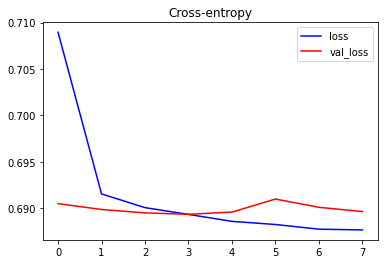

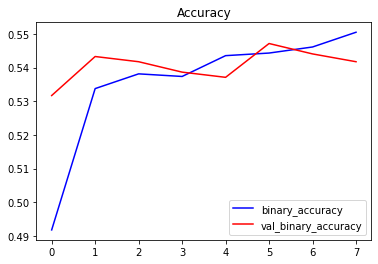

In [19]:
# neural_network_analysis(nodes_first, nodes_second, batch, dropout_include, SEED, X_train, y_train, X_valid, y_valid, count, rate_=None)

# model 333: nodes_first= 32, nodes_second=8, batch=64, dropout_include=False, rate=None. Binary accuracy: 0.5504894256591797
neural_network_analysis(32, 8, 64, False, SEED, X_train, y_train, X_valid, y_valid, 334)

model 334: nodes_first= 32, nodes_second=32, batch=64, dropout_include=False, rate=None. Binary accuracy: 0.5484286546707153


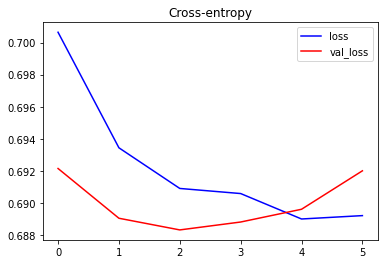

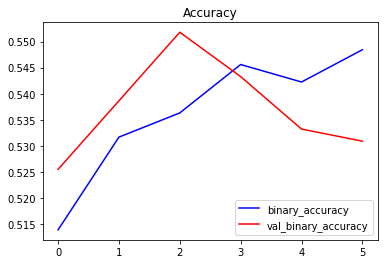

In [18]:
# model 335: nodes_first= 32, nodes_second=32, batch=64, dropout_include=False, rate=None. Binary accuracy: 0.5484286546707153
neural_network_analysis(32, 32, 64, False, SEED, X_train, y_train, X_valid, y_valid, 334)

model 334: nodes_first= 16, nodes_second=4, batch=128, dropout_include=False, rate=None. Binary accuracy: 0.5481710433959961


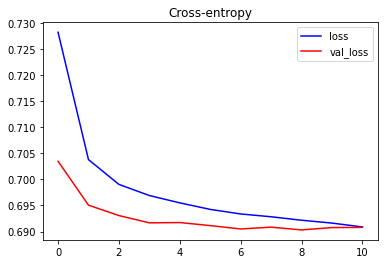

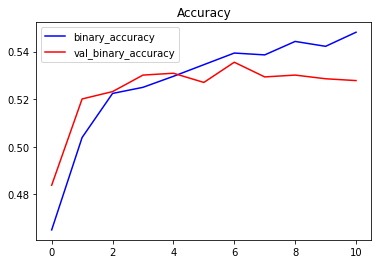

In [15]:
# model 344: nodes_first= 16, nodes_second=4, batch=128, dropout_include=False, rate=None. Binary accuracy: 0.5481710433959961
neural_network_analysis(16, 4, 128, False, SEED, X_train, y_train, X_valid, y_valid, 334)